## Lecture 18 EEP118


Introduction to Panel Data, start notes Lecture 18

Two year panel 

Fixed effects


Chapter 13.3 and 13.4

See R code on bcourses and also notebook in datahub for this lecture

Pset 4 posted - see bcourses for due date 

Pset 5 posted soon on bcourses


### Does unemployment affect crime rate?



In [1]:
#Lecture18.R
#LECTURE 18



install.packages("pacman")
# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)


pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots




Installing package into ‘/srv/r’
(as ‘lib’ is unspecified)



In [3]:

#read in a Stata dataset DATA LECTURE 18
mydata <- read_dta("Lecture18_CRIME2.dta")
#head(mydata)

#summary stats variables
summary(mydata)



      pop              crimes            unem           officers     
 Min.   :  56168   Min.   :  4124   Min.   : 2.400   Min.   : 109.0  
 1st Qu.: 226182   1st Qu.: 19653   1st Qu.: 5.500   1st Qu.: 419.2  
 Median : 359932   Median : 31358   Median : 6.950   Median : 717.5  
 Mean   : 395461   Mean   : 39664   Mean   : 7.972   Mean   : 923.1  
 3rd Qu.: 511556   3rd Qu.: 51821   3rd Qu.: 9.475   3rd Qu.:1219.8  
 Max.   :1181868   Max.   :164452   Max.   :20.300   Max.   :5042.0  
                                                                     
     pcinc            west           nrtheast          south       
 Min.   : 4525   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 7012   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 8649   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   : 8918   Mean   :0.3043   Mean   :0.1522   Mean   :0.3261  
 3rd Qu.:10384   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :14474   Max.   :1.0000 

In [4]:
#Use only year 1987
mydata87<-mydata[mydata$year==87,]
summary(mydata87)

      pop              crimes            unem           officers     
 Min.   :  64742   Min.   :  4124   Min.   : 2.400   Min.   : 121.0  
 1st Qu.: 238195   1st Qu.: 19869   1st Qu.: 5.000   1st Qu.: 475.5  
 Median : 349764   Median : 31100   Median : 5.750   Median : 748.0  
 Mean   : 399373   Mean   : 41204   Mean   : 5.889   Mean   : 944.2  
 3rd Qu.: 501820   3rd Qu.: 52568   3rd Qu.: 6.375   3rd Qu.:1201.5  
 Max.   :1091523   Max.   :164452   Max.   :10.400   Max.   :5042.0  
     pcinc            west           nrtheast          south       
 Min.   : 6494   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 9346   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :10428   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :10620   Mean   :0.3043   Mean   :0.1522   Mean   :0.3261  
 3rd Qu.:11757   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :14474   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      year         area           

What do we see in the summary stats in 1987? 

We see that there is variation in crime rates and unemployment across cities 
but also there is cross city variation across other aspects in 1987

We have 46 cities

We see that there is variation in crime rates and unemployment across cities but also there is cross city variation across other aspects in 1987


Lets consider the relationship between unemployment and crime rate in 1987 cross the 46 cities in the data

Model- city j       

𝑐𝑟𝑖𝑚𝑒𝑟𝑎𝑡𝑒_𝑗=𝛽_0+𝛽_1  𝑢𝑛𝑒𝑚_𝑗_ +𝑣_𝑗

In [5]:
#reg 1, column (1)
reg1<-lm(crmrte~unem, mydata87)
summary(reg1)



Call:
lm(formula = crmrte ~ unem, data = mydata87)

Residuals:
   Min     1Q Median     3Q    Max 
-57.55 -27.01 -10.56  18.01  79.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  128.378     20.757   6.185  1.8e-07 ***
unem          -4.161      3.416  -1.218     0.23    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.6 on 44 degrees of freedom
Multiple R-squared:  0.03262,	Adjusted R-squared:  0.01063 
F-statistic: 1.483 on 1 and 44 DF,  p-value: 0.2297


In the above results we see that beta hat of unemployment is Large, negative, but not significant


In the model above we have possibly many omitted variables that could also affect crime rate

OVB: corr(pop density, crime)> 0 corr(poor, crime) >0   and corr(pop density, unem)> 0 corr(poor, unem) >0  => overestimate beta1 (positive OVB)

If police presence, law enf expenditures negatively correlated with crime and positively correlated with unem => underestimate beta1 (negative OVB)



So, lets us control for factors in the model also and estimate a model to be presented in a column (2)

In [6]:
#So, lets us control for factors in the model also model for column (2)
reg2<-lm(crmrte~unem+area+west+offarea+lawexpc+pcinc,mydata87)
summary(reg2)


Call:
lm(formula = crmrte ~ unem + area + west + offarea + lawexpc + 
    pcinc, data = mydata87)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.847 -21.511  -6.829  18.940  75.114 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 140.06017   51.16000   2.738  0.00927 **
unem         -6.70024    3.71634  -1.803  0.07913 . 
area          0.05867    0.04757   1.233  0.22491   
west        -21.96336   12.27535  -1.789  0.08135 . 
offarea      -0.11442    0.66876  -0.171  0.86504   
lawexpc       0.02137    0.01859   1.149  0.25736   
pcinc        -0.00185    0.00352  -0.526  0.60215   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.27 on 39 degrees of freedom
Multiple R-squared:  0.1587,	Adjusted R-squared:  0.02932 
F-statistic: 1.227 on 6 and 39 DF,  p-value: 0.3138


In this model 2,  when we control for other city controls, betahat of unemployment is large, negative and significant at ten percent level (t stat 1.8)

From the ouput of reg 2, how would you interpret beta hat for unemployment?

Controlling for other factors pertaining to each city, (area, west, off area, lawexp, pcinc) an increase in unemployment rate is correlated with a significant drop in crime rate by 6.7 crimes per one thousand population in 1987


In [8]:
#reg 3 both years and control for year 87 with a dummy for column (3)
#generate a dummy variable equal to one for 1987 and zero otherwise
mydata$d87<-0
mydata$d87[mydata$year==87]<-1

#run model with both years
reg3<-lm(crmrte~unem+d87, mydata)
summary(reg3)

#recall that Crime rate varies in the data between 50-179
# and recall that Unemployment rate varies in the data between 2-10.4



Call:
lm(formula = crmrte ~ unem + d87, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.474 -21.794  -6.266  18.297  75.113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  93.4202    12.7395   7.333 9.92e-11 ***
unem          0.4265     1.1883   0.359    0.720    
d87           7.9404     7.9753   0.996    0.322    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.99 on 89 degrees of freedom
Multiple R-squared:  0.01221,	Adjusted R-squared:  -0.009986 
F-statistic: 0.5501 on 2 and 89 DF,  p-value: 0.5788


In model (3) Adding one more year the sign of the behat unemployment coefficient is now positive and not significant

In [9]:
#both years and also add controls to the model in addition to year 1987 dummy
#column (4)
reg4<-lm(crmrte~unem+d87+ area+west+offarea+lawexpc+ pcinc, mydata) 
summary(reg4)



Call:
lm(formula = crmrte ~ unem + d87 + area + west + offarea + lawexpc + 
    pcinc, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.083 -19.299  -6.501  17.131  80.396 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 98.831683  27.642535   3.575 0.000583 ***
unem        -0.539560   1.314398  -0.410 0.682485    
d87          3.206582  11.452435   0.280 0.780173    
area         0.012940   0.028321   0.457 0.648913    
west        -9.142998   7.467479  -1.224 0.224233    
offarea      0.088086   0.406458   0.217 0.828955    
lawexpc      0.020481   0.013576   1.509 0.135150    
pcinc       -0.001666   0.002663  -0.625 0.533357    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.92 on 84 degrees of freedom
Multiple R-squared:  0.07223,	Adjusted R-squared:  -0.005082 
F-statistic: 0.9343 on 7 and 84 DF,  p-value: 0.4847


In column (4), Adding one more year and also city controls, the  sign of beta hat for unemployment flipped to negative and not significant

Also, in (4) none of the other city controls are significant. 


Ideally, we would love to control for everything that is specific to each of the 46 cities in the data that is the same in both years. We can do this by creating a city specific variable, one for each of the cities, and this variable is called city dummy variable:

City1=1      if city is 1 and city1=0, otherwise.

City2=1      if city is 2 and city2=0, otherwise

…

City46=1    if city is 46 and city46=0, otherwise

We can add those to the regression.  These are city fixed effects
 
But one more thing…

We have a constant. And, a constant( a vector of ones) is equal to city1+city2+… +city46, so adding all 46 dummies and a constant in a regression does not work - we would have collinearity. 

So the solution is to have a constant and drop one of the 46 city dummies


## Introducing city fixed effects (FE) regression in R : use  felm



In [10]:
# And, in (4) still many omitted factors that can affect crime rate: good mayor, gangs, gun ownership, etc etc

#Because of this, we will add city fixed effects
#felm stands for fixed effects linear model  " | city "
#Fixed effects column (5)
#use felm
reg5<-felm(crmrte~unem+d87|city, mydata)
summary(reg5)


#can I put 46 city fixed effects and constant? 

#NO. We can add a constant and all but one FE, so 45 in this case.



Call:
   felm(formula = crmrte ~ unem + d87 | city, data = mydata) 

Residuals:
    Min      1Q  Median      3Q     Max 
-26.458  -6.384   0.000   6.384  26.458 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)   
unem   2.2180     0.8779   2.527  0.01519 * 
d87   15.4022     4.7021   3.276  0.00206 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.18 on 44 degrees of freedom
Multiple R-squared(full model): 0.8909   Adjusted R-squared: 0.7743 
Multiple R-squared(proj model): 0.1961   Adjusted R-squared: -0.6627 
F-statistic(full model):7.642 on 47 and 44 DF, p-value: 1.701e-10 
F-statistic(proj model): 5.365 on 2 and 44 DF, p-value: 0.008221 



What do we see in terms of beta hat for unemployment?

In reg ( 5)Controlling for all constant characteristics of cities (that do not vary over time) =city fixed effects,  and for effect of time (dummy for year 87)  that captures changes in 1987 relative to 1982 factors that affect crime rate that are common to all cities, a 1 percent point increase in unemployment rate is associated with a significant  2.2. per thousand increase in crime rate

                                                                                                                                      

Finally, lets consider the relationship between unemployment and crime rate in 1982 and 1987 cross the 46 cities in the data controlling for city specific constant factors as well as other yearly varying factors

In [11]:


#adding city FE and also time city varying controls
#column (6) 
reg6<-felm(crmrte~unem+d87+ offarea+lawexpc+pcinc|city,mydata) 
summary(reg6)



Call:
   felm(formula = crmrte ~ unem + d87 + offarea + lawexpc + pcinc |      city, data = mydata) 

Residuals:
    Min      1Q  Median      3Q     Max 
-23.641  -7.441   0.000   7.441  23.641 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)  
unem     2.931904   1.133562   2.586   0.0133 *
d87     39.575676  22.667792   1.746   0.0883 .
offarea  1.838022   1.785312   1.030   0.3093  
lawexpc -0.006982   0.013632  -0.512   0.6113  
pcinc   -0.005697   0.005683  -1.002   0.3220  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.31 on 41 degrees of freedom
Multiple R-squared(full model): 0.8964   Adjusted R-squared:  0.77 
Multiple R-squared(proj model): 0.2367   Adjusted R-squared: -0.6941 
F-statistic(full model):7.094 on 50 and 41 DF, p-value: 1.405e-09 
F-statistic(proj model): 2.543 on 5 and 41 DF, p-value: 0.04286 



The output above controls for city FE but does not show us the 45 estimated city fixed effects hats

Above we add a year fixed effect, controlling for things that are common to all cities that changed over the two years,

Above we also add 45 city fixed effects, controlling for things that are specific to each city that could affect crime rate in each city that do not vary over the two years

And we also control for city and year varying controls such as per capita income, expenditures in law enforecement and number of officers per area of the city.

The beta hat of unemployment is then 2.93 now in this model reg 6

# WHEN WE RUN:
#reg5<-felm(crmrte~unem+d87+offarea+lawexpc+pcinc|city, mydata)

#summary(reg5)

The above command controls for 45 (46 minus 1) city FE and the constant, but we do not see the estimated 
parameters for the 45 city dummy fixed effect coefficients


The commands below show the estimated city FE, we see them
do not run the command below if you have lots of FE because the output will be super long and
you may not be interested in seeing all the estimated values,
you just want to control for city-specific constant over time factors via the city FE


The commands above and below yield the same results.
The command below where we see each of the 45 city fixed effect estimates and the constant estimate also


In [12]:


#reg with fixed effects and log of unemployment claims as Y variable
reg6n <- lm(crmrte ~ unem + d87+offarea+lawexpc+pcinc+factor(city) , data = mydata)
summary(reg6n)



Call:
lm(formula = crmrte ~ unem + d87 + offarea + lawexpc + pcinc + 
    factor(city), data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.641  -7.441   0.000   7.441  23.641 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     91.617867  46.916985   1.953 0.057697 .  
unem             2.931904   1.133562   2.586 0.013345 *  
d87             39.575676  22.667792   1.746 0.088319 .  
offarea          1.838022   1.785312   1.030 0.309269    
lawexpc         -0.006982   0.013632  -0.512 0.611251    
pcinc           -0.005697   0.005683  -1.002 0.322015    
factor(city)2   12.531215  17.559832   0.714 0.479499    
factor(city)3  -10.681088  18.511861  -0.577 0.567104    
factor(city)4   -0.047492  20.300769  -0.002 0.998145    
factor(city)5   14.252073  18.708691   0.762 0.450546    
factor(city)6   27.309291  24.276556   1.125 0.267164    
factor(city)7   -2.246401  19.200705  -0.117 0.907435    
factor(city)8  -46.936284  61.726


## It dropped city 1 fixed effect


How do you interpret the estimate of Intercept? 

91.617867 = E[crime rate] when unemployment=0 all other factors=0 including
 for city2=0 to city46==0 , that is for city 1, 
and for dyear87=0 that is year 1982 
     




Given the output in reg 6n: and that the constant is for city 1:


1. Which cities have significantly higher crime rates on average than city 1 (at 5% level) ? 

That would be City 17, 19 and 20, because you can see from the full output which city fixed effects are positive and significant. also city 37, 41, 42 and 43 have positive and significant coeffiicents


2. Which cities have significantly higher crime rates on average than city 1 (at 5% level) ? 

That would be from the full output which city fixed effects are negative and significant. 


Only city 30 is negative betahat and significant.

there are some other cities with negative betahats but they are not significantly different from zero





## Make table of results

make table, see the R code in Bcourses where you runt he command below after installing stargazer

#library(stargazer)

#stargazer(list(reg1,reg2,reg3,reg4,reg5,reg6), type="text",keep.stat=c("n","rsq"))


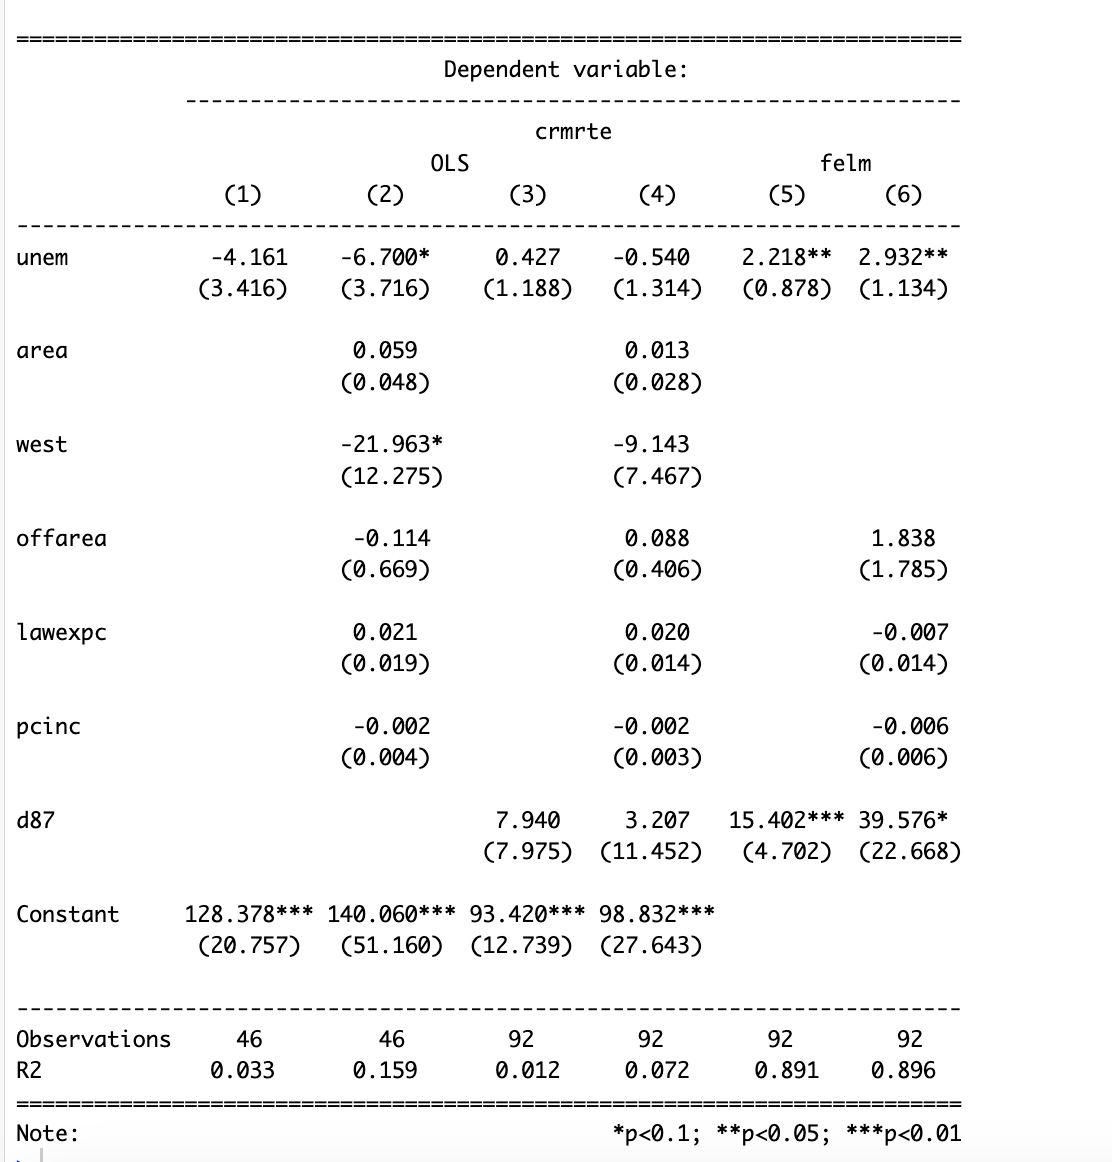


## Looking at the beta hat for unemployment in each column (1), (2), etc

In column (1) beta hat of unemployment is Large, negative, but not significant

In column (2) when control for other city controls, betahat of unemployment is large, negative and significant at ten percent level (t stat 1.8)

In column (3) Adding one more year the sign of the behat unemployment coefficient is now positive and not significant

In column (4), Adding one more year and also city controls, the  sign of beta hat for unemployment flipped to negative and not significant Also, in (4) none of the other city controls are significant. 

And, in (4) still many omitted factors that can affect crime rate: good mayor, gangs, gun ownership, etc etc. Because of this, we will add city fixed effects in column (5), capturing anything specific to each city that does not vary over time.

In column (5), controlling for all constant characteristics of cities (that do not vary over time) =city fixed effects,  and for effect of time (dummy for year 87)  that captures changes in 1987 relative to 1982 factors that affect crime rate that are common to all cities, a 1 percent point increase in unemployment rate is associated with a significant  2.2. per thousand increase in crime rate

How do you interpret column (6) results?

Do it yourself



Daily Assignment if you like

In reg (6) controlling for city specific time varying factors such as officers per square mile, law enforcement expenditure, per capita income, as well as the controls in (5) above, the effect is very stable, in (6) it is 2.93. 

WHY CAN WE NOT ESTIMATE IN (6) A COEFFICIENT ON AREA AND and also one for WEST REGION?

Why does R drop them out of the regression?

Given that the coefficient on unemployment changes from 2.1 to 2.93 (when we control for officers per square mile), what is the sign of the correlation of officers per square mile and unemployment rate (assuming that officers per square mile are negatively correlated with crime rate)?
